In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#добавляем библиотеку matplotlib.pyplot помимо двух основных, для того чтобы иметь более продвинутую визуализацию на этапах анализа

**HeartDisease** - респонденты, которые когда-либо сообщали о наличии ишемической болезни сердца (ИБС) или инфаркта миокарда (ИМ).

**BMI** - Индекс массы тела (ИМТ)

**Smoking** - Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь? [Примечание: 5 пачек = 100 сигарет]

**AlcoholDrinking** - сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю

**Stroke** - Был ли у вас инсульт?

**PhysicalHealth** - Теперь подумайте о своем физическом здоровье, которое включает в себя физические заболевания и травмы, сколько дней в течение последних 30 дней ваше физическое здоровье было плохим? (0-30 дней)

**Mental Health** - Размышляя о своем психическом здоровье, сколько дней в течение последних 30 дней ваше психическое здоровье было плохим? (0-30 дней)

**DiffWalking** - испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?

**Sex **- Вы мужчина или женщина?

**AgeCategory** - возрастная категория четырнадцатого уровня

**Race **- Вмененное значение расы/этнической принадлежности

**Diabetic** - Был ли у вас диабет?

**PhysicalActivity** - взрослые, которые сообщили, что занимались физической активностью или физическими упражнениями в течение последних 30 дней, помимо своей обычной работы.

**GenHealth** - Могли бы вы сказать, что в целом ваш уровень здоровья...

**SleepTime** - В среднем, сколько часов сна вы получаете за 24-часовой период?

**Asthma** - Была ли у вас астма?

**KidneyDisease** - Не включая камни в почках, инфекцию мочевого пузыря или недержание мочи, вам когда-нибудь говорили, что у вас заболевание почек?

**SkinCancer**  - Был ли у вас рак кожи?

In [2]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Проверяем, нет ли пустых значений в датасете и несовпадающих со столбцами типов данных

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Пустых значений нет. В некоторых колонках будет полезно поменять тип данных, для того чтобы дальше было более удобно анализировать.

В десяти столбцах поменяем данные с Yes/No на бинарные True/False, тем самым поменяв тип колонки на bool

In [4]:
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: x == 'Yes')
df['Smoking'] = df['Smoking'].apply(lambda x: x == 'Yes')
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(lambda x: x == 'Yes')
df['Stroke'] = df['Stroke'].apply(lambda x: x == 'Yes')
df['DiffWalking'] = df['DiffWalking'].apply(lambda x: x == 'Yes')
df['Diabetic'] = df['Diabetic'].apply(lambda x: x == 'Yes')
df['PhysicalActivity'] = df['PhysicalActivity'].apply(lambda x: x == 'Yes')
df['Asthma'] = df['Asthma'].apply(lambda x: x == 'Yes')
df['KidneyDisease'] = df['KidneyDisease'].apply(lambda x: x == 'Yes')
df['SkinCancer'] = df['SkinCancer'].apply(lambda x: x == 'Yes')

Также в таблице есть столбцы, в которых для удобства анализа и визуализации можно сделать новые категориальные переменные: сделаем категорию BMI - Индекс массы тела

In [5]:
def get_bmi_cat(bmi): 
    if bmi <=18.49:
        return 'Underweight'
    elif bmi <=24.99:
        return 'Normal weight'
    elif bmi <=29.99:
        return 'Overweight'
    elif bmi <=34.99:
        return 'Obese I'
    elif bmi <=39.99:
        return 'Obese II'
    elif bmi >=40.0:
        return 'Obese III'

In [6]:
df ['BMI Category']= df['BMI'].apply(get_bmi_cat)
df ['BMI Category'] = pd.Categorical(df ['BMI Category'])

Проверим, все ли значения были учтены при создании функции для категоризации

In [7]:
df ['BMI Category'].value_counts(dropna = False) #лишние значения не выходят, значит все ок

Overweight       114512
Normal weight     97331
Obese I           61345
Obese II          25112
Obese III         16385
Underweight        5110
Name: BMI Category, dtype: int64

Также стоит изменить тип данных на категориальный в некоторых других столбцах, для того чтобы с ними можно было работать не только как со строками, но и как с числами при необходимости

In [8]:
df['AgeCategory'] = pd.Categorical(df['AgeCategory'])
df['GenHealth'] = pd.Categorical(df['GenHealth'])

In [9]:
df['PhysicalHealth'].sort_values()

319794     0.0
152609     0.0
152610     0.0
152611     0.0
258884     0.0
          ... 
251305    30.0
205435    30.0
91071     30.0
39686     30.0
263402    30.0
Name: PhysicalHealth, Length: 319795, dtype: float64

Изменим в столбцах PhysicalHealth и MentalHealth тип данных на int, так в них указаны количества полных дней, когда респондентов беспокоило их физическое/ментальное здороьве за последний месяц

In [10]:
df['PhysicalHealth'] = df['PhysicalHealth'].astype(int)
df['MentalHealth'] = df['MentalHealth'].astype(int)

In [11]:
#посмотрим на основные описательные статистики по имеющимся численным данным
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Заметно, что по столбикам BMI и SleepTime явно есть выбросы, так как значения не похожи на реальные. Определим эти выбросы

In [12]:
q1_ST = df['SleepTime'].quantile(0.25)
q3_ST = df['SleepTime'].quantile(0.75)
iqr_ST = q3_ST - q1_ST
#определяем квартили и заводим для них переменные

In [13]:
ST_iqr_outlier_threshold_bottom = q1_ST - 1.5 * iqr_ST
ST_iqr_outlier_threshold_up = q3_ST + 1.5 * iqr_ST
print(ST_iqr_outlier_threshold_bottom)
print(ST_iqr_outlier_threshold_up)
#здесь код взят на основе кода в курсе SmartLMS
#Определяем верхнюю и нижнюю границу, на основе которых выделим выбросы

3.0
11.0


Понимаем, что выбросы есть и слева, и справа от медианы

Посчитаем то же самое для BMI

In [14]:
q1_BMI = df['BMI'].quantile(0.25)
q3_BMI = df['BMI'].quantile(0.75)
iqr_BMI = q3_BMI - q1_BMI
BMI_iqr_outlier_threshold_bottom = q1_BMI - 1.5 * iqr_BMI
BMI_iqr_outlier_threshold_up = q3_BMI + 1.5 * iqr_BMI
print(BMI_iqr_outlier_threshold_bottom)
print(BMI_iqr_outlier_threshold_up)

12.945
42.505


In [15]:
df[((df['SleepTime'] > ST_iqr_outlier_threshold_up) | (df['SleepTime'] < 
                                                      ST_iqr_outlier_threshold_bottom)) | ((df['BMI'] > 
                                                      BMI_iqr_outlier_threshold_up) | (df['BMI'] < 
                                                      BMI_iqr_outlier_threshold_bottom))].shape 
 #Мы посчитали количество сразу по обоим столбцам через ИЛИ, захватив данные ниже левых границ ИЛИ выше правых                                                     

(14682, 19)

Всего в нашем датасете 14682 выброса. Избравляемся от них через фильтрацию

In [16]:
df = df[((df['SleepTime'] <= ST_iqr_outlier_threshold_up) 
& (df['SleepTime'] >= ST_iqr_outlier_threshold_bottom)) & ((df['BMI'] <= BMI_iqr_outlier_threshold_up) 
& (df['BMI'] >= BMI_iqr_outlier_threshold_bottom))] 

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI Category
0,False,16.60,True,False,False,3,30,False,Female,55-59,White,True,True,Very good,5.0,True,False,True,Underweight
1,False,20.34,False,False,True,0,0,False,Female,80 or older,White,False,True,Very good,7.0,False,False,False,Normal weight
2,False,26.58,True,False,False,20,30,False,Male,65-69,White,True,True,Fair,8.0,True,False,False,Overweight
3,False,24.21,False,False,False,0,0,False,Female,75-79,White,False,False,Good,6.0,False,False,True,Normal weight
4,False,23.71,False,False,False,28,0,True,Female,40-44,White,False,True,Very good,8.0,False,False,False,Normal weight


Перед началом визуализации данных посмотрим, сколько в нашей таблице всего имеют заболевания сердца

In [18]:
df['HeartDisease'].value_counts() #из почти 305тыс респондентов заболевания есть у 25тыс

False    279644
True      25469
Name: HeartDisease, dtype: int64

А также посмотрим расределение респондентов по возрасту и полу

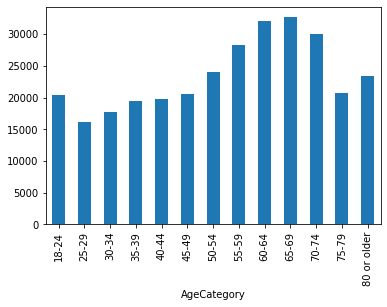

In [19]:
df.groupby('AgeCategory')['Sex'].size().plot(kind = 'bar')
#здесь используем grouby, а не value_counts, тк важна сортировка по порядку категорий, а не по убыванию значений 
plt.show()
#используем команду, чтобы убрать строку с данными о библиотеке для графиков

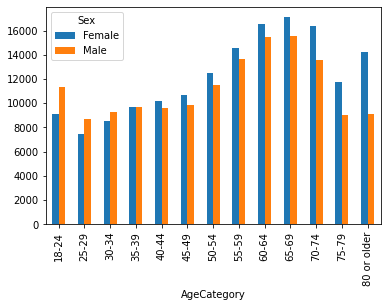

In [20]:
df.groupby('AgeCategory')['Sex'].value_counts().unstack().plot(kind = 'bar')
plt.show()

Теперь в рамках анализа интересно посмотреть, как происходит распределение среди тех, кто испытывает проблемы с сердцем. Для этого заведем новую переменную

In [21]:
df_heart_disease = df[df['HeartDisease'] == True]
df_heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI Category
35,True,32.98,True,False,True,10,0,True,Male,75-79,White,True,True,Poor,4.0,False,False,True,Obese I
42,True,25.06,False,False,False,0,0,True,Female,80 or older,White,True,False,Good,7.0,False,False,True,Overweight
43,True,30.23,True,False,False,6,2,True,Female,75-79,White,True,True,Fair,8.0,False,True,False,Obese I
45,True,20.37,True,False,False,3,0,False,Female,70-74,White,False,False,Poor,10.0,False,False,False,Normal weight
77,True,34.33,False,False,False,0,0,False,Female,55-59,White,False,True,Good,8.0,False,False,False,Obese I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,True,38.45,False,False,True,30,15,True,Female,55-59,Hispanic,True,True,Poor,6.0,True,False,False,Obese II
319767,True,36.21,True,False,False,0,0,True,Female,75-79,Hispanic,True,True,Good,8.0,False,False,False,Obese II
319781,True,37.12,True,False,False,0,0,False,Male,35-39,Hispanic,False,True,Very good,7.0,False,False,False,Obese II
319786,True,33.20,True,False,False,0,0,False,Female,60-64,Hispanic,True,True,Very good,8.0,True,False,False,Obese I


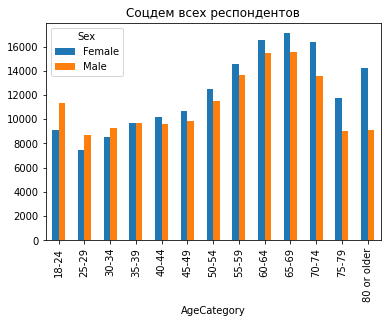

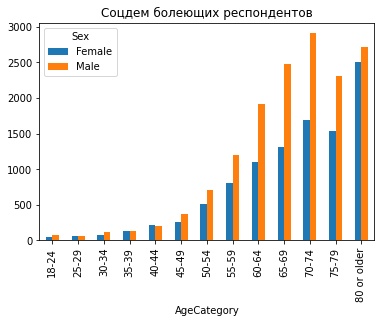

In [22]:
df.groupby('AgeCategory')['Sex'].value_counts().unstack().plot(kind = 'bar', title = 'Cоцдем всех респондентов')
df_heart_disease.groupby('AgeCategory')['Sex'].value_counts().unstack().plot(kind = 'bar', title = 'Соцдем болеющих респондентов')
plt.show()

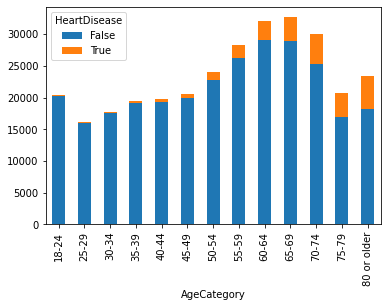

In [23]:
df.groupby('AgeCategory')['HeartDisease'].value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()
#график по возрасту построим один над другим, чтобы нагляднее видеть, где доля имеющих заболевания превалирует

Таким образом, в первую очередь от заболеваний сердца страдают больше мужчины в сравнении с женщинами. Их меньше в генеральной совокупности, однако они заметно преобладают среди болеющих. 

Помимо этого на графике видно, что больше всего риску развития сердечных заболеваний люди 60+

В качестве гипотезы интересно проанализировать, влияют ли другие хронические заболевания на наличие заболеваний сердца. 
Для этого было бы удобно использовать корреляцию, если бы в датасете хранилась числовая информация, а тк у нас есть только бинарные данные можно посчитать проценты пересечений


In [24]:
#Cуммируем количество тех, кто страдает от хотя бы одного/двух/трех/четырех из четырех хронических заболеваний, а также имеет заболевания сердца и переведем в проценты, умножив на 100
#Используем сумму по строкам (для этого axis 1)
print(df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 1]['HeartDisease'].value_counts(normalize=True)*100)
print(df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 2]['HeartDisease'].value_counts(normalize=True)*100)
print(df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 3]['HeartDisease'].value_counts(normalize=True)*100)
print(df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 4]['HeartDisease'].value_counts(normalize=True)*100)

False    87.46791
True     12.53209
Name: HeartDisease, dtype: float64
False    75.288411
True     24.711589
Name: HeartDisease, dtype: float64
False    59.933931
True     40.066069
Name: HeartDisease, dtype: float64
True     52.857143
False    47.142857
Name: HeartDisease, dtype: float64


Теперь визуализируем эти данные

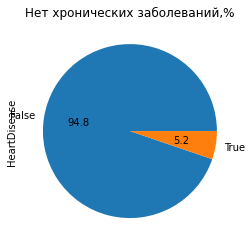

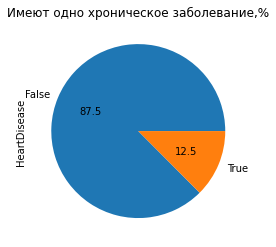

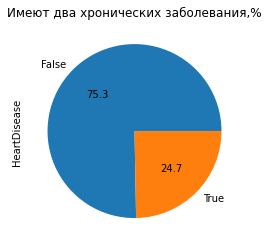

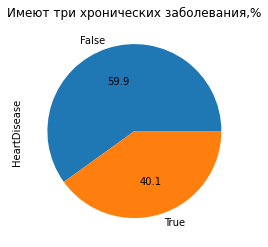

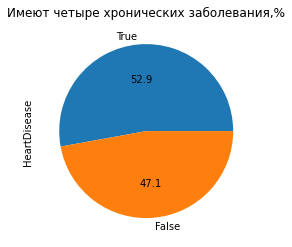

In [25]:
df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 0]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Нет хронических заболеваний,%')
plt.show()
df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 1]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Имеют одно хроническое заболевание,%')
plt.show()
df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 2]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Имеют два хронических заболевания,%')
plt.show()
df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 3]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Имеют три хронических заболевания,%')
plt.show()
df[(df[['Diabetic','Asthma','KidneyDisease','SkinCancer']] == True).sum(axis=1) == 4]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Имеют четыре хронических заболевания,%')
plt.show()

Теперь видно, что другие заболевания связаны с заболеваниями сердца:

Из тех, кто имеет 1/4 заболеваний, 13% также имеют заболевания сердца

2/4 - 25%

3/4 - 40%

4/4 - 47%

In [26]:
#делаем то же самое, чтобы проверить зависимость от вредных привычек
print(df[(df[['Smoking','AlcoholDrinking']] == True).sum(axis=1) == 1]['HeartDisease'].value_counts(normalize=True)*100)
print(df[(df[['Smoking','AlcoholDrinking']] == True).sum(axis=1) == 2]['HeartDisease'].value_counts(normalize=True)*100)

False    88.100911
True     11.899089
Name: HeartDisease, dtype: float64
False    93.63903
True      6.36097
Name: HeartDisease, dtype: float64


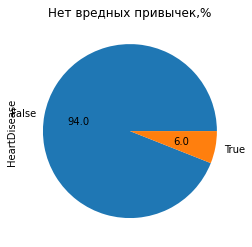

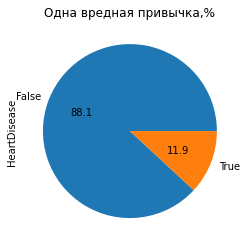

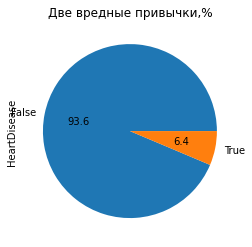

In [27]:
df[(df[['Smoking','AlcoholDrinking']] == True).sum(axis=1) == 0]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Нет вредных привычек,%')
plt.show()
df[(df[['Smoking','AlcoholDrinking']] == True).sum(axis=1) == 1]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Одна вредная привычка,%')
plt.show()
df[(df[['Smoking','AlcoholDrinking']] == True).sum(axis=1) == 2]['HeartDisease'].value_counts().plot(kind='pie', autopct='%.1f', title = 'Две вредные привычки,%')
plt.show()

Зависимость между наличием вредных привычек и заболеваемостью выявить в рамках анализа данного датасета не удалось, так как не происходит никакой взаимосвязи данных